# T06. Cepstrum


În aplicații de codare, recunoaștere și sinteză a semnalului vocal, este foarte importantă reducerea dimensiunii și a complexității parametrilor de intrare. Reamintim faptul că semnalul vocal are un grad înalt de redundanță, atât în domeniul timp, cât și în frecvență. Pentru a reduce această redundanță, se folosesc metode de modelare matematică a semnalului vocal. Printre cele mai cunoscute se numără: modelul liniar-separabil (sursă-filtru), modelul undelor glotale sau modelul tuburilor acustice. Cel mai des utilizat, însă, este **modelul sursă-filtru** sau liniar separabil. 

# Modelul sursă-filtru de producere a vorbirii

**Modelul sursă-filtru (MSF)** de modelare a semnalului vocal pornește de la o simplificare extremă a tipurilor de semnale vocale și face separarea lor strict pe baza sonorității (sonor-nesonor). Sonoritatea se referă la prezența sau absența periodicității din forma de undă, periodicitatea fiind un rezultat al utilizării corzilor vocale în fonație. Astfel că, transpus în noțiuni lingvistice se referă la discriminarea vocale - consoane.
Totodată consideră totalitatea organelor fonatoare (cu excepția plămânilor și a corzilor vocale) ca fiind un simplu fitru ce modulează sursa de aer, fie ea periodică, în cazul vocalelor, sau aperiodică, în cazul consoanelor. 

Ca urmare, MSF va modela sursa pentru semnalele sonore ca fiind un tren de impulsuri distanțate cu perioada fundamentală ($T_0$), iar pentru semnalele nesonore, sursa va fi un zgomot alb gaussian. În funcție de semnalul vocal dorit la ieșirea modelului, filtrul dat de tractul vocal va fi implementat folosind coeficienții estimați pentru acesta. 

În figura de mai jos este prezentată diagrama modelului sursă filtru.

<img src="images/05_source-filter.png">
<p style="text-align:center">Figura 1. Modelul sursă-filtru de producere a vorbirii<p>

# Cepstrumul

Pentru a putea utiliza MSF este nevoie ca informațiile legate atât de sursă, cât și de filtru să poată fi extrase din semnalul vocal. Însă, conform teoriei semnalelor, ieșirea unui sistem va fi dată de convoluția dintre intrare $s(n)$ și funcția de transfer a sistemului $h(n)$:
		
>$y[n]=x[n]\otimes h[n]$
        
În cazul semnalului vocal, sursa este dată de fluxul de aer expirat și modulat (sau nu) de vibrația corzilor vocale, iar filtrul sau sistemul este reprezentat de tractul vocal.

Pentru a putea separa sursa de filtru, este nevoie de o operație matematică homomorfică ce va transforma operația de convoluție (neliniară) într-o operație liniară, cum ar fi adunarea. O astfel de transformare sau filtrare este și cepstrumul.

**Cepstrumul** este definit ca fiind transformata Fourier inversă a logaritmului modulului transformatei Fourier directe:
		
>$c[n] = \mathcal{F}^{-1}\left \{ log \left | \mathcal{F}(x[n])\right | \right \}$
        
Domeniul de definiție al cepstrumului nu va fi însă timpul, deoarece din transformata Fourier s-a păstrat doar spectrul de amplitudini, informația de fază fiind eliminată prin aplicarea modulului. Acest nou domeniu este denumit **quefrency** pentru a face diferențierea dintre domeniul de frecvență și acesta. 


Urmărind operațiile matematice aplicate asupra semnalului de intrare, se poate observa că transformata Fourier va transforma convoluția în înmulțire, iar logaritmarea va transforma operația de înmulțire în adunare. Ca urmare, cepstrumul va fi alcătuit din **suma reprezentării cepstrale a sursei și reprezentarea cepstrală a tractului vocal**.



Pentru a putea aplica și înțelege analiza cepstrală,  mai întâi citim două semnale, unul sonor și unul nesonor: 

In [1]:
import wave
import numpy as np

######################
# Citim vocala
input_wav_vowel = 'speech_files/e.wav'
wav_struct_vowel = wave.open(input_wav_vowel, 'r')
sampling_frequency = wav_struct_vowel.getframerate()
wav_bytes_vowel = wav_struct_vowel.readframes(-1)
wav_data_vowel = np.frombuffer(wav_bytes_vowel, \
                               dtype='int16')
wav_data_vowel = wav_data_vowel\
                /float(max(abs(wav_data_vowel)))
wav_struct_vowel.close()

######################
# Citim consoana
input_wav_consonant = 'speech_files/s.wav'
wav_struct_consonant = wave.open(input_wav_consonant, 'r')
wav_bytes_consonant = wav_struct_consonant.readframes(-1)
wav_data_consonant = np.frombuffer(wav_bytes_consonant, \
                                   dtype='int16')
wav_data_consonant = wav_data_consonant\
                /float(max(abs(wav_data_consonant)))
wav_struct_consonant.close()

Să le și afișăm și ascultăm:

Vowel duration 0.275625 second
Consonant duration 0.383813 second


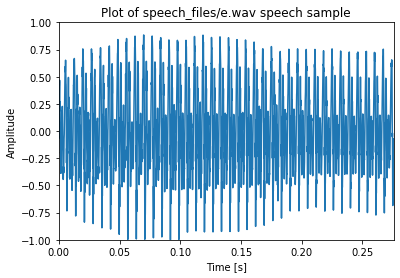

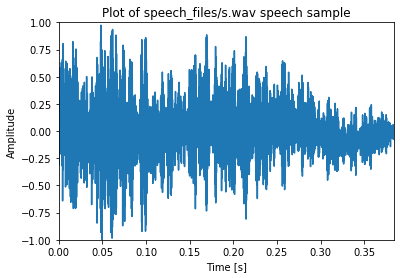

In [2]:
import matplotlib.pylab as pl
%matplotlib inline

######################
# Plot vocală
time_axis_vowel = np.arange(0, len(wav_data_vowel))\
            *1.00/sampling_frequency
duration_vowel = len(wav_data_vowel)\
            *1.00/sampling_frequency
print ("Vowel duration %f second" %duration_vowel)
pl.plot(time_axis_vowel, wav_data_vowel)
pl.xlim([0, duration_vowel])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of %s speech sample" \
            %input_wav_vowel)

######################
# Plot consoana

time_axis_consonant = \
        np.arange(0, len(wav_data_consonant))\
        *1.00/sampling_frequency
duration_consonant = len(wav_data_consonant)\
        *1.00/sampling_frequency
print ("Consonant duration %f second" %duration_consonant)
pl.figure()
pl.plot(time_axis_consonant, wav_data_consonant)
pl.xlim([0, duration_consonant])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of %s speech sample" %input_wav_consonant);

In [3]:
import IPython
IPython.display.Audio(wav_data_vowel, rate=sampling_frequency)

In [4]:
IPython.display.Audio(wav_data_consonant, rate=sampling_frequency)

Și tot la fel ca în tutorialele anterioare, să extragem câte un cadru de analiză din fiecare semnal:

Window length: 512 samples


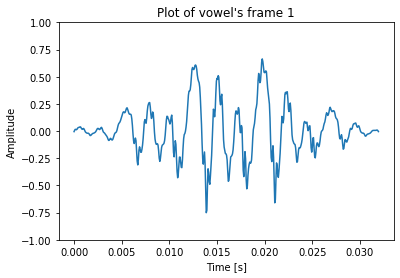

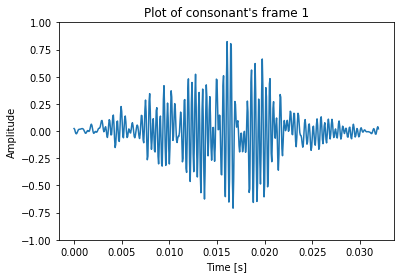

In [5]:
# Fereastra de analiză cu lungime egală cu 
# putere a lui 2 fără suprapunere
window_length = int(20*1e-3*sampling_frequency)
window_fft = int(2**np.ceil(np.log2(window_length)))
print ("Window length: %d samples" %window_fft)
p = 0

# Primul cadru 
k = 0
# Cadrul de vocală
vowel_frame = wav_data_vowel[int(k*(1-p))\
            *window_fft: int((k*(1-p)+1))*window_fft]
# Fereastră Hamming
vowel_frame = np.hamming(window_fft) * vowel_frame

# Cadru de consoană
consonant_frame = wav_data_consonant[int(k*(1-p))\
            *window_fft: int((k*(1-p)+1))*window_fft]
# Fereastră Hamming
consonant_frame = np.hamming(window_fft) * consonant_frame

# Afișăm cadrele extrase 
pl.figure()
time_axis = np.arange(0, window_fft)\
                *1.00/sampling_frequency
pl.plot(time_axis, vowel_frame)
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of vowel's frame %i" %(k+1))


pl.figure()
pl.plot(time_axis, consonant_frame)
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of consonant's frame %i" %(k+1));

Odată ce avem la dispoziție cele două cadre de semnal, putem calcula cepstrumul sau coeficienții cepstrali folosind formula de definiție. 

În secvența de cod următoare vor fi afișați și pașii intermediari ai analizei cepstrale și efectul lor asupra semnalului:

>**(OBS)** Instrucțiunile de mai jos calculează cepstrul real și nu cel complex. 



/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


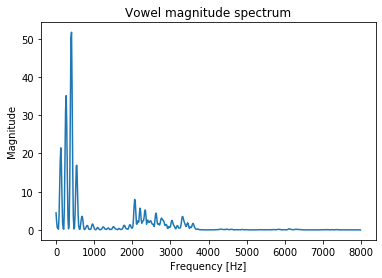

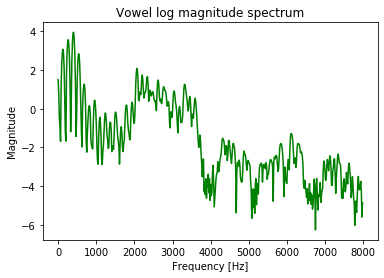

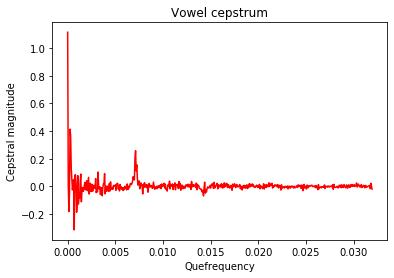

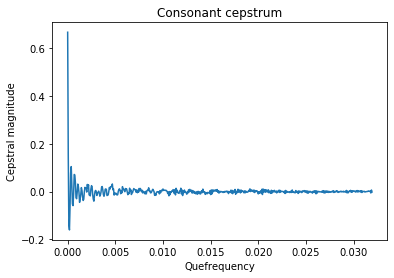

In [6]:
from scipy.fftpack import fft
from scipy.fftpack import ifft
import numpy as np

# Def cepstrum: inversa Fourier a logaritmului 
# modulului transformatei Fourier a semnalului

# 1) FFT
# OBS: pentru a evita fenomenul de alias, 
# numărul de puncte FFT trebuie să fie mai mare 
# decât lungimea ferestrei
nfft = 1024
fft_vowel = fft(vowel_frame, nfft)

# 2) Modulul FFT = spectrul de amplitudini
abs_fft_vowel = np.abs(fft_vowel)
pl.figure()
frequency_axis = np.arange(nfft//2)\
            *sampling_frequency/nfft
pl.plot(frequency_axis, \
            abs_fft_vowel[nfft//2:][::-1],)
pl.xlabel("Frequency [Hz]")
pl.ylabel("Magnitude")
pl.title("Vowel magnitude spectrum")

# 3) Logaritm din modul de FFT
log_abs_fft_vowel = np.log(abs_fft_vowel)
pl.figure()
pl.plot(frequency_axis, \
        log_abs_fft_vowel[nfft//2:][::-1], 'g')
pl.xlabel("Frequency [Hz]")
pl.ylabel("Magnitude")
pl.title("Vowel log magnitude spectrum")

# 4) CEPSTRUM = IFFT de logaritm din modul de FFT 
vowel_cepstrum = ifft(log_abs_fft_vowel)
pl.figure()
que_axis = np.arange(0, window_fft)\
            *1.00/sampling_frequency
pl.plot(time_axis, \
        vowel_cepstrum[nfft//2:][::-1],'r')
pl.xlabel("Quefrequency")
pl.ylabel("Cepstral magnitude")
pl.title("Vowel cepstrum")


# Pentru consoană vom calcula coeficienții 
# într-o singură instrucțiune
consonant_cepstrum = ifft(np.log10(\
        np.abs(fft(consonant_frame, nfft))))

# Afișăm cepstrumul 
pl.figure()
pl.plot(time_axis, consonant_cepstrum[nfft//2:][::-1])
pl.xlabel("Quefrequency")
pl.ylabel("Cepstral magnitude")
pl.title("Consonant cepstrum");

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">A. Ce puteți spune despre cele două cepstrumuri? 
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">B. Se poate calcula F0 din cepstrumul vocalei? Ce valoare are pentru cadrul curent? 
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">C. Calculați și comparați cepstrumul pentru cele două vocale utilizate în tutorialul anterior (Transformata Fourier). Ce se poate observa?
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">D. Ce aplicații ar putea avea cepstrumul? 
    </td>
</tr>
</table>

>Răspunsul vostru...

# Procesul de liftare


Mergând mai departe și folosind procesul de **liftare**,  putem separa din cadrul cepstrumului caracteristicile sursei de caracteristicile filtrului. Ca urmare a operațiilor din formula de calcul a cepstrumului, informațiile legate de filtru vor fi reprezentate de valori mici ale quefrecvenței, iar cele legate de sursă de valorile mari. Astfel că 
liftarea se referă la separarea coeficienților de ordin mic (de obicei primii 20-30) de coeficienții cepstrali de ordin înalt. Convenția de denumire pentru aceste seturi de coeficienți este: **h** pentru coeficienții filtrului și **u** pentru coeficienții sursei. 

Se poate observa în figura de mai jos acest proces de liftare. Totodată se poate observa și faptul că pentru un semnal periodic, cepstrumul va conține o serie maxime în partea superioară. Aceste maxime sunt date de $F_0$ și constituie o altă modalitate de calcul a frecvenței fundamentale a semnalului vocal. 

<img style="width:60%" src="images/05_cepstrum_sonor2.png">
<p style="text-align:center">Figura 2. Cepstrum și procesul de liftare - segment sonor<p>



<img style="width:60%" src="images/05_cepstrum_nesonor.png">
<p style="text-align:center">Figura 3. Cepstrum și procesul de liftare - segment nesonor<p>


Un alt aspect important al cepstrumului este evidențiat de calcularea transformatei Fourier a coeficienților cepstrali de ordin jos, corespunzători tractului vocal. Eliminând componenta periodică dată de vibrația corzilor vocale prin procesul de liftare, spectrul nou obținut va pune în evidență mult mai bine anvelopa spectrală și odată cu aceasta și **formanții** = frecvențele de rezonanță ale tractului vocal. 

Astfel că, dorim să vizualizăm spectrul dat de segmentele individuale ale procesului de liftare, *spectrul lui h* și *spectrul lui u*.

> **(OBS)**  Vom calcula cepstrul complex de data aceasta. Față de cepstrul real, acesta calculează logaritmul complex și astfel ține cont și de faza componentelor de frecvență ale semnalului. Codul de mai jos conține și o serie de alte operații matematice necesare unui calcul corect a liftării. Înțelegerea completă a codului nu este necesară la acest moment. Rezultatul pașilor intermediari poate fi afișat pentru o mai bună înțelegere a lor.

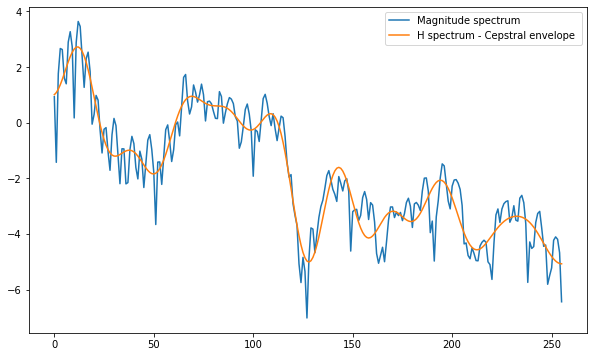

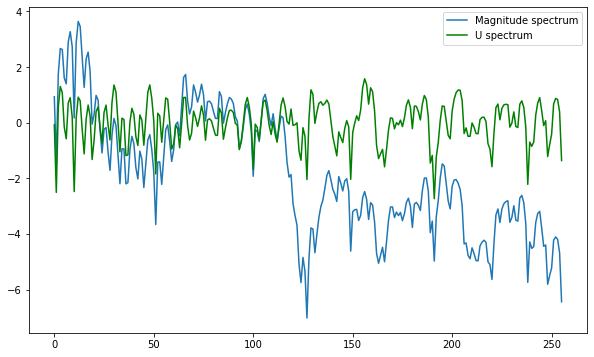

In [7]:
# Fereastră Hamming
hamm_frame = vowel_frame*np.hamming(window_fft)
# Rearanjăm cadrul de analiză
bw=np.concatenate((hamm_frame[int(window_fft/2):\
    window_fft],  hamm_frame[:int(window_fft/2)]))
    
# Calculăm FFT  
frame_fft=fft(bw,window_fft)
phase_rad=np.angle(frame_fft)
phase_rad_unwrap=np.unwrap(phase_rad);

# Logaritm complex
complex_logarithm = np.log(np.abs(frame_fft))\
            +phase_rad_unwrap*np.sqrt(-1+0j);

# Spectrul de amplitudini
magnitude_spectrum = np.real(complex_logarithm)

# Cepstrumul
ceps=ifft(complex_logarithm,window_fft)

# Creăm o fereastră rectangulară de ordin 20 
# pentru a extrage separat coeficienții pentru h și u
lifter_index = 20
lifter = np.zeros(window_fft)
lifter[0:lifter_index+1] = 1
lifter[window_fft-lifter_index+1:window_fft] = 1
      
# Extragem H
cepsl=np.real(ceps*lifter)
h=np.real(fft(cepsl,window_fft))


# Extragem U
inv_lifter = (1-lifter)
cepsll = np.real(ceps*inv_lifter)
u = np.real(fft(cepsll,window_fft))

# Plotăm spectrul și anvelopa cepstrală (spectrul lui h)
pl.figure(figsize=(10,6))
pl.plot(magnitude_spectrum[window_fft//2:][::-1])
pl.plot(h[window_fft//2:][::-1]) 
pl.legend(["Magnitude spectrum",\
           "H spectrum - Cepstral envelope "])

# Plotăm spectrul semnalului și a lui u 
pl.figure(figsize=(10,6))
pl.plot(magnitude_spectrum[window_fft//2:][::-1])
pl.plot(u[window_fft//2:][::-1], 'g') 
pl.legend(["Magnitude spectrum","U spectrum" ]);

Din anvelopa cepstrală putem să observăm acum o mai bună evidențiere a formanților (benzile de frecvență cu energie ridicată). Iar din cele două spectre, ale lui $h$ și $u$, putem să vedem faptul că însumarea lor ne va da spectrul de amplitudini al semnalului, ceea ce înseamnă că prin intermediul cepstrumului am reușit să facem separarea sursă-filtru.


<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">E. Modificați indexul coeficientului la care se realizează liftarea (variabila `lifter_index`) și interpretați rezultatele.
    </td>
</tr>
</table>

>Răspunsul vostru...

# Coeficienții Mel-cepstrali

În practică, cea mai des întâlnită aplicație a cepstrumului este în recunuoașterea automată a vorbirii, pentru parametrizarea formei de undă a semnalului vocal și reducerea variabilității parametrilor la nivel de foneme intra și inter-vorbitor. În plus, pentru a caracteriza forma de undă și din punct de vedere perceptual, nu doar fizic, se folosesc scale de frecvență neliniare. Una dintre cele mai des utilizate este scala Mel, discutată și  în tutorialul anterior. 

Rezultatul acestor două procesări este cunoscut sub numele de **coeficienți Mel-cepstrali** (en. Mel Frequency Cepstral Coefficients - **MFCC**). Aceștia reprezintă energia medie din benzile de frecvență date un banc de filtre de lungime N, egal distanțate pe scala Mel. 

Mai întâi reluăm din tutorialul anterior vizualizarea filtrelor egal distanțate pe scală Mel:

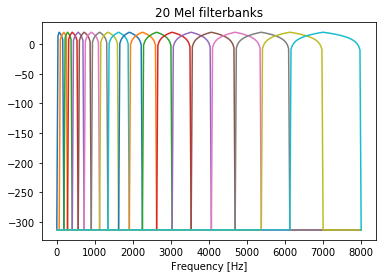

In [8]:
# 20 filtre
nfilt=20
NFFT = 512
pow_frames = 10
low_freq_mel = 0

# Convertim Hz la Mel
high_freq_mel = (2595 * \
    np.log10(1 + (sampling_frequency / 2) / 700)) 

# Filtre egal distanțate pe scală Mel
mel_points = np.linspace(low_freq_mel, \
                high_freq_mel, nfilt + 2)  

# Convertim Mel în Hz
hz_points = (700 * (10**(mel_points \
                / 2595) - 1))  
bin = np.floor((NFFT + 1) * hz_points \
                / sampling_frequency)

# Bancul de filtre
fbank = np.zeros((nfilt, \
            int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   
    f_m = int(bin[m])             
    f_m_plus = int(bin[m + 1])  

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) \
            / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) \
            / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)

# Stabilitate numerică
filter_banks = np.where(filter_banks == 0,\
        np.finfo(float).eps, filter_banks)

# Afișăm în dB
filter_banks = 20 * np.log10(filter_banks)  
freq_axis = np.arange(0, NFFT//2+1)\
        *sampling_frequency/NFFT
pl.plot(freq_axis, filter_banks)
pl.xlabel("Frequency [Hz]")
pl.title ("20 Mel filterbanks");

Pentru a calcula coeficienții MFCC din cadrele semnalului de intrare, putem să utilizăm funcția disponibilă în modulul `librosa`. Pentru a instala modulul utilizăm utilitarul `pip`

In [9]:
#!pip install librosa

In [10]:
import librosa.feature as lb

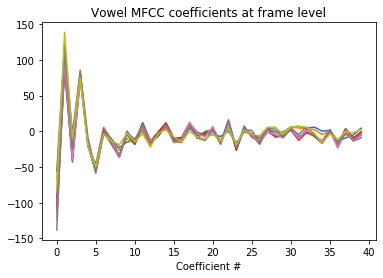

In [11]:
# Extragem automat coeficienții MFCC din toate cadrele 
# vocalei. Numărul de coeficienți extrași este egal cu 40
vowel_mfcc = lb.mfcc(wav_data_vowel, \
                     sampling_frequency, n_mfcc=40)

# plotăm pe același grafic coeficienții din cadrele 
# de semnal ale vocalei
pl.title("Vowel MFCC coefficients at frame level")
pl.xlabel("Coefficient #")
pl.plot(vowel_mfcc);

Se poate observa faptul că aceștia sunt foarte similari de-a lungul cadrelor de analiză.

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">G. Care este diferența dintre coeficienții MFCC și cepstrum? 
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">H. Extrageți coeficienții MFCC din aceeași vocală de la mai mulți vorbitori. Directorul speech_files/ conține înregistrări ale vocalelor din limba română pronunțate de doi vorbitori diferiți. Plotați rezultatele. 
    </td>
</tr>
</table>

In [12]:
#####################
## YOUR CODE HERE
#####################

Să vizualizăm și coeficienții Mel-cepstrali pentru o consoană:

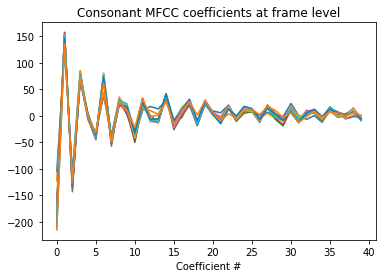

In [13]:
# Citim consoana
input_wav_file_2 = 'speech_files/s.wav'
wav_struct_2 = wave.open(input_wav_file_2, 'r')
wav_bytes_2 = wav_struct_2.readframes(-1)
wav_data_2 = np.frombuffer(wav_bytes_2, dtype='int16')
wav_data_2 = wav_data_2/float(max(abs(wav_data_2)))
sampling_frequency = wav_struct_2.getframerate()
wav_struct_2.close()

# Extragem coeficienții MFCC
consonant_mfccs = lb.mfcc(wav_data_2, sampling_frequency, n_mfcc=40)

# Afișăm coeficienții
pl.title("Consonant MFCC coefficients at frame level")
pl.xlabel("Coefficient #")
pl.plot(consonant_mfccs);

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">I. Extrageți coeficienții MFCC din aceeași consoană de la mai mulți vorbitori. Sunt similari și pentru consoane sau doar pentru vocale?
    </td>
</tr>
</table>

>Răspunsul vostru...

# Concluzii

În acest tutorial a fost prezentată metoda cepstrală de analiză a semnalului vocal. Aceasta se bazează pe o transformare homomorfică pentru a separa sursa de tractul vocal. Cepstrumul combinat cu scala neliniară de frecvențe Mel este aplicat în multiple metode de analiză, recunoaștere și sinteză a semnalului vocal pentru a modela tractul vocal și pentru a reduce variabilitatea parametrilor extrași din segmentele semnalului vocal.


Link-uri suplimentare:

https://github.com/jameslyons/python_speech_features

http://www.earlevel.com/main/

http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html